# Visual Data Analysis of Missed Doctors Appointments in Brazil

## Introduction

**Lets say a person makes a doctor appointment in advance, but misses it on day of appointment.**

**What factors are common amongst patients who do not show up for doctor appointments?**
**Can text messages help patients not miss appointments? Does the number of wait days influence missed appointments?**

**We try to answer these questions by analyzing a 2016 Brazilian healthcare dataset.
Data of appointments was combined from more than 45 clinics and hospitals at municipallevel in Brazil betweeen 04/29/2016 and 6/8/2016.**

**The link to the dataset is below.**

https://www.kaggle.com/joniarroba/noshowappointments

**Below are notes on the dataset.**

* **Scholarship variable means this concept** = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia


* **In the "No-show" column "No" means the patient went to the appointment. "Yes" means the patient missed the appointment.**



## Data Wrangling


**Import necessary libraries.**

In [1225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the raw data.**

In [1226]:
df = pd.read_csv("KaggleV2-May-2016.csv")

**Check the information.**

In [1227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**The "Patient ID" is a float, we will need to change it into integers in later steps. "ScheduledDay" and "AppointmentDay" columns are strings, we will need to change the columns into datetime in later steps.**

**Below, check columns for any null values.**

In [1228]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**There are no null values in this dataset.**

**Below, check for duplicated rows.**

In [1229]:
df.duplicated().sum()

0

**There are no duplicated rows in this dataset.**

**Below, check the first five rows of the dataframe.**

In [1230]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**"PatientID" numbers are floats while other numbers are integers.**

**Below, change "PatientID" numbers to integers.**

In [1231]:
df['PatientId'] = df['PatientId'].astype(int)

**Convert "ScheduledDay" to datetime.**

In [1232]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

**Make new column "ScheduledDay_date" with just the date of "ScheduledDay".**

In [1233]:
df['ScheduledDay_date'] = df['ScheduledDay'].dt.date

**Convert "AppointmentDay" column to datetime.**

In [1234]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

**Make new column "AppointmentDay_date" with just the date of "AppointmentDay".**

In [1235]:
df['AppointmentDay_date'] = df['AppointmentDay'].dt.date

**Make new column "AppointmentDay_month" with just the month of "AppointmentDay".**

In [1236]:
df['AppointmentDay_month'] = df['AppointmentDay'].apply(lambda x:x.month)

**Make new column "AppointmentDay_dow" for day of week of "AppointmentDay".**

In [1237]:
df['AppointmentDay_dow'] = df['AppointmentDay'].apply(lambda x:x.dayofweek)

**Check the column "AppointmentDay_dow".**

In [1238]:
df['AppointmentDay_dow'].head()

0    4
1    4
2    4
3    4
4    4
Name: AppointmentDay_dow, dtype: int64

**The day of week is represented by integers. Reference link below to change integers into the weekday it represents.**

https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek

**Below, make dictionary to change integers into the weekday it represents. Convert integers of "AppointmentDay_dow" column into day of week with .map() function.**

In [1239]:
dow_dict = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

df['AppointmentDay_dow']= df['AppointmentDay_dow'].map(dow_dict)

**Check converted "AppointmentDay_dow" column.**

In [1240]:
df['AppointmentDay_dow']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: AppointmentDay_dow, Length: 110527, dtype: object

**Make new column "Wait_Days" by subtracting "ScheduledDay_date" from "AppointmentDay_date" column.**

In [1187]:
df['Wait_Days'] = df['AppointmentDay_date']-df['ScheduledDay_date']

**Check "Wait_Days" column.**

In [1188]:
df['Wait_Days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: Wait_Days, Length: 110527, dtype: timedelta64[ns]

**The "Wait_Days" column is in datetime format. Also it has the text "days" after each number**

**Below, convert "Wait_Days" column to string, extract just the number. Convert the number into integers.**

In [1189]:
df['Wait_Days']=df['Wait_Days'].astype(str)
df['Wait_Days']=df['Wait_Days'].apply(lambda x:x.split(" ")[0])
df['Wait_Days']=df['Wait_Days'].astype(int)

**Check converted "Wait_Days" column.**

In [1190]:
df['Wait_Days']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Wait_Days, Length: 110527, dtype: int64

**Revise the spelling of columns "Hipertension" and "Handcap" to "Hypertension" and "Handicap".**

In [1191]:
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap'},inplace=True)

**Check the revised column names.**

In [1192]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'ScheduledDay_date', 'ScheduledDay_month', 'ScheduledDay_dow',
       'AppointmentDay_date', 'AppointmentDay_month', 'AppointmentDay_dow',
       'Wait_Days'],
      dtype='object')

**Sort the dates of "ScheduledDay_date".**

In [1193]:
df['ScheduledDay_date'].sort_values()

3764      2015-11-10
46292     2015-12-03
102797    2015-12-07
102796    2015-12-07
102799    2015-12-07
             ...    
92108     2016-06-08
92107     2016-06-08
92092     2016-06-08
92112     2016-06-08
86333     2016-06-08
Name: ScheduledDay_date, Length: 110527, dtype: object

**It seems some patients scheduled the appointments months in advance.**

**Below, sort the dates of "AppointmentDay_date".**

In [1194]:
df['AppointmentDay_date'].sort_values()

0        2016-04-29
2151     2016-04-29
2152     2016-04-29
2153     2016-04-29
2154     2016-04-29
            ...    
92055    2016-06-08
99217    2016-06-08
99218    2016-06-08
99224    2016-06-08
91900    2016-06-08
Name: AppointmentDay_date, Length: 110527, dtype: object

**All appointments in this dataset were from 04/29/2016 - 06/08/2016.**

**Below, use describe function to look and min/max values of this dataset.**

In [1196]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ScheduledDay_month,AppointmentDay_month,Wait_Days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,4.823871,5.210048,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.715801,0.473780,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,12.000000,6.000000,179.000000


**There are some weird min values. The min value of the "Age" column is -1. This is not possible as a person has to be at least 0 years old. Also, the min "Wait_Days" is -6. This is not possible as well, as the shortest time a patient can wait is 0 days. We will need to delete rows with these values.**

**Below, find columns where "Age" is below 0.**

In [1197]:
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_month,ScheduledDay_dow,AppointmentDay_date,AppointmentDay_month,AppointmentDay_dow,Wait_Days
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,...,0,0,No,2016-06-06,6,Monday,2016-06-06,6,Monday,0


**Drop row where Age is below zero.**

In [1198]:
df.drop(axis=0,index=99832,inplace=True)

**Check again for any rows where "Age" is below 0.**

In [1199]:
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_month,ScheduledDay_dow,AppointmentDay_date,AppointmentDay_month,AppointmentDay_dow,Wait_Days


**Below, find columns where "Wait Days" is below 0.**

In [1200]:
df.query('Wait_Days<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_month,ScheduledDay_dow,AppointmentDay_date,AppointmentDay_month,AppointmentDay_dow,Wait_Days
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,...,1,0,Yes,2016-05-10,5,Tuesday,2016-05-09,5,Monday,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,...,1,0,Yes,2016-05-18,5,Wednesday,2016-05-17,5,Tuesday,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,...,0,0,Yes,2016-05-05,5,Thursday,2016-05-04,5,Wednesday,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,...,0,0,Yes,2016-05-11,5,Wednesday,2016-05-05,5,Thursday,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,...,0,0,Yes,2016-05-04,5,Wednesday,2016-05-03,5,Tuesday,-1


**Drop rows where Wait_Days is below zero.**

In [1201]:
df.drop(df.index[[27033,55226,64175,71533,72362]],inplace=True)

**Check again for any rows where "Wait_Days" is below 0.**

In [1202]:
df.query('Wait_Days<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_month,ScheduledDay_dow,AppointmentDay_date,AppointmentDay_month,AppointmentDay_dow,Wait_Days


**Check the first five rows of the cleaned dataset.**

In [1203]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_month,ScheduledDay_dow,AppointmentDay_date,AppointmentDay_month,AppointmentDay_dow,Wait_Days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,0,No,2016-04-29,4,Friday,2016-04-29,4,Friday,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,0,No,2016-04-29,4,Friday,2016-04-29,4,Friday,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,0,No,2016-04-29,4,Friday,2016-04-29,4,Friday,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,2016-04-29,4,Friday,2016-04-29,4,Friday,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,0,No,2016-04-29,4,Friday,2016-04-29,4,Friday,0


## Exploratory Data Analysis with Visuals



**Make Pie Chart showing overall percentage of No-Show Appointments.**

Text(0.5, 1.0, 'Appointment Overall No-Show Percentage')

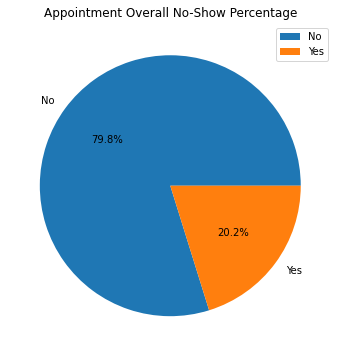

In [1360]:
plt.figure(figsize=(6,6))
pie_chart_data = df.groupby("No-show").count()
my_labels = 'No','Yes'
ax_01_01 = plt.pie(data=pie_chart_data,x="PatientId",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Appointment Overall No-Show Percentage')

* **Overall, 20.2 percent of patients did not show up at their appointment.**
* **79.8 percent of patients showed up at their appointment.**

**Below, make pie chart exploring the percentage of no-shows amongst patients with hypertension.**

Text(0.5, 1.0, 'Patients with Hypertension No-Show Percentage')

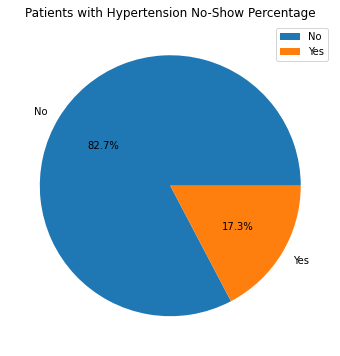

In [1363]:
plt.figure(figsize=(6,6))
pie_chart_hypertension = df[df["Hypertension"]==1].groupby("No-show").count()
my_labels = 'No','Yes'
ax_14 = plt.pie(data=pie_chart_hypertension,x="PatientId",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Patients with Hypertension No-Show Percentage')

* **The no-show rate for patients with hypertension is 17.3% and is lower than the average of 20.2%**

**Below, make pie chart exploring the percentage of no-shows amongst patients with alcoholism.**

Text(0.5, 1.0, 'Patients with Alcoholism No-Show Percentage')

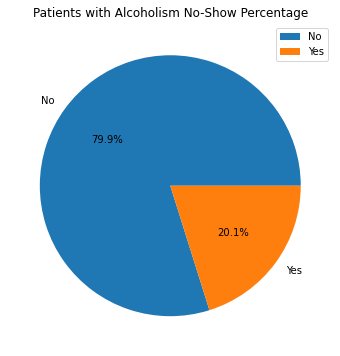

In [1364]:
plt.figure(figsize=(6,6))
pie_chart_alcohol = df[df["Alcoholism"]==1].groupby("No-show").count()
my_labels = 'No','Yes'
ax_14 = plt.pie(data=pie_chart_alcohol,x="Alcoholism",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Patients with Alcoholism No-Show Percentage')

* **Patients with alcoholism have a no-show rate of 20.1 which is around the average no-show rate. Alcoholism does not influence no-show rates.**

**Below, make function to calculate percentage of no-shows.**

In [1365]:
def no_show_percentage(data, column):

    #no show count by column
    no_show = data[data["No-show"]=="Yes"].groupby(column).count()["PatientId"]
    #all count by column
    all_appoint = data.groupby(column).count()["PatientId"]
    #percentage of no-shows by column
    month_percent = (no_show/all_appoint)*100

    return month_percent

**Make bar chart exploring if gender has any influence in not showing up for an appointment.**

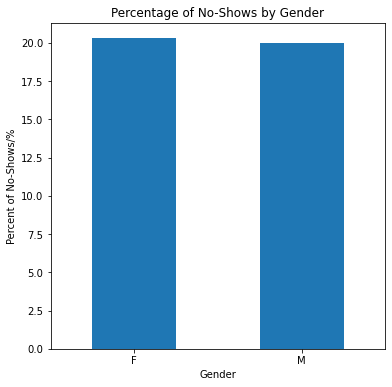

In [1366]:
plt.figure(figsize=(6,6))
ax_01 = no_show_percentage(data=df,column="Gender").plot(kind='bar')
ax_01.set_title("Percentage of No-Shows by Gender")
ax_01.set_ylabel("Percent of No-Shows/%")
ax_01.set_xlabel("Gender")
ax_01 = plt.gca()
ax_01.tick_params(axis='x', labelrotation = 0)
plt.show()

* **Gender does not influence missing an appointment as the no-show proportions amongst males and females are about the same.**

**Below, make bar chart exploring if receiving a scholarship has any influence in not showing up for an appointment.**

[Text(0, 0, 'Not Received'), Text(1, 0, 'Received')]

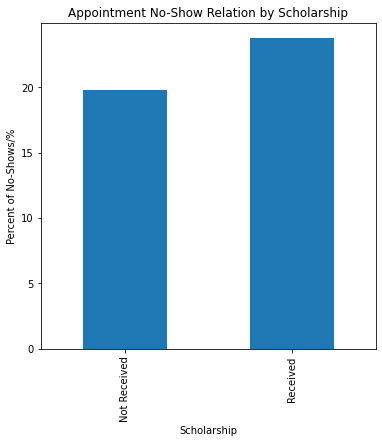

In [1367]:
plt.figure(figsize=(6,6))
ax02 = no_show_percentage(data=df,column="Scholarship").plot(kind='bar')
ax02.set_title("Appointment No-Show Relation by Scholarship")
ax02.set_ylabel("Percent of No-Shows/%")
#ticks
labels = [item.get_text() for item in ax03.get_xticklabels()]
labels[0] = 'Not Received'
labels[1] = 'Received'
ax02.set_xticklabels(labels)

* **A patient is more likely to not show up at an appointment if receiving a scholarship.**

**Below, make bar chart exploring if receiving a SMS(text message) has any influence in not showing up for an appointment.**

[Text(0, 0, 'Not Received'), Text(1, 0, 'Received')]

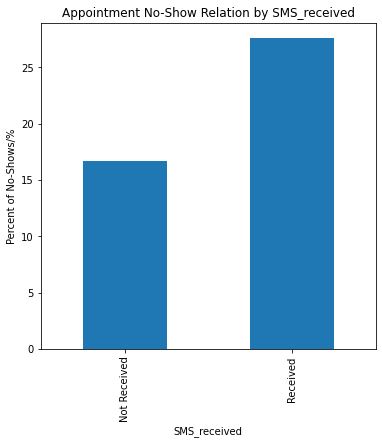

In [1368]:
plt.figure(figsize=(6,6))
ax03 = no_show_percentage(data=df,column="SMS_received").plot(kind='bar')
ax03.set_title("Appointment No-Show Relation by SMS_received")
ax03.set_ylabel("Percent of No-Shows/%")
#ticks
labels = [item.get_text() for item in ax03.get_xticklabels()]
labels[0] = 'Not Received'
labels[1] = 'Received'
ax03.set_xticklabels(labels)

* **Patients are more likely not to show up for an appointment if they received a SMS(text) message.**

**Below, make bar chart exploring if the day of week influences not showing up for an appointment.**

Text(0.5, 0, 'Day of Week')

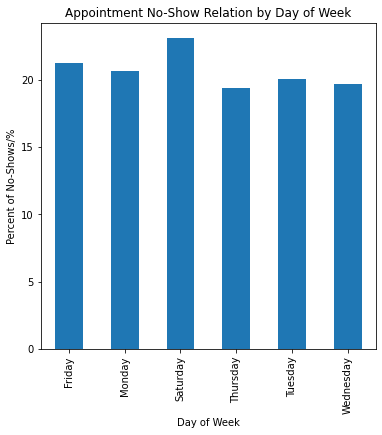

In [1369]:
plt.figure(figsize=(6,6))
ax05 = no_show_percentage(data=df,column="AppointmentDay_dow").plot(kind='bar')
ax05.set_title("Appointment No-Show Relation by Day of Week")
ax05.set_ylabel("Percent of No-Shows/%")
ax05.set_xlabel("Day of Week")

* **The day of week of appointment does not seem to affect the no show rate.**

**Below, make histogram exploring the distribution of appointments by date.**

Text(0.5, 0, 'Appointment Date')

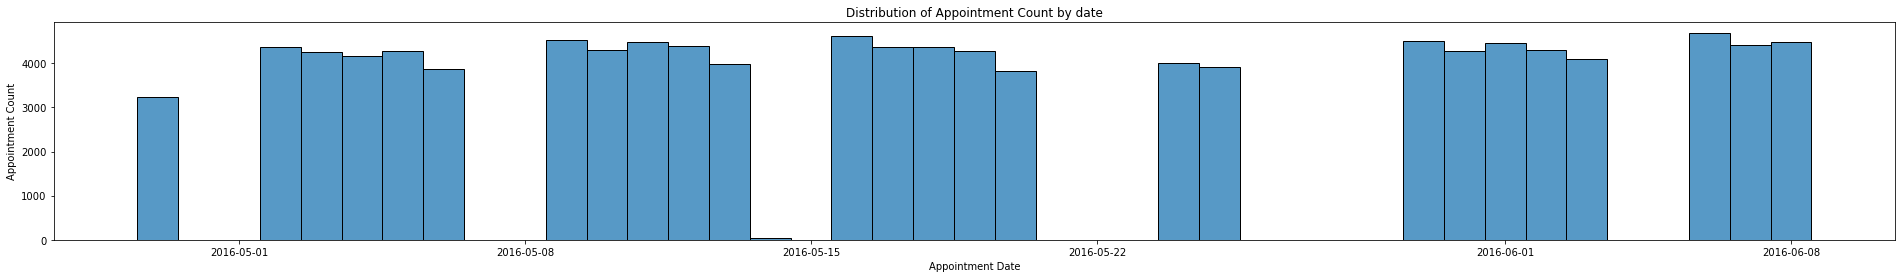

In [1370]:
plt.figure(figsize=(33,4))
plt.title('Distribution of Appointment Count by date')
ax01_10 = sns.histplot(data=df,x="AppointmentDay_date",bins=30)
ax01_10.set_ylabel("Appointment Count")
ax01_10.set_xlabel("Appointment Date")

* **Most of the appointments were made in May 2016. This makes sense as the period this dataset was recorded was from 04/29/2016 and 6/8/2016.**

**Below, make barplot of the percentage of no-shows by month.**

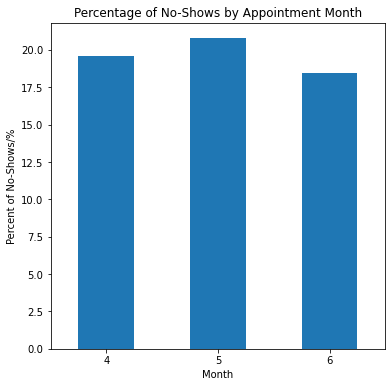

In [1371]:
plt.figure(figsize=(6,6))
ax06_01 = no_show_percentage(data=df,column="AppointmentDay_month").plot(kind='bar')
ax06_01.set_title("Percentage of No-Shows by Appointment Month")
ax06_01.set_ylabel("Percent of No-Shows/%")
ax06_01.set_xlabel("Month")
ax06_01 = plt.gca()
ax06_01.tick_params(axis='x', labelrotation = 0)
plt.show()

* **The month of appointment has does not affect the no-show rate as the no-show percentage is around 20 percent for all three months.**

**Below, make barplot of the percentage of no-shows by wait days.**

Text(0.5, 0, 'Wait Days')

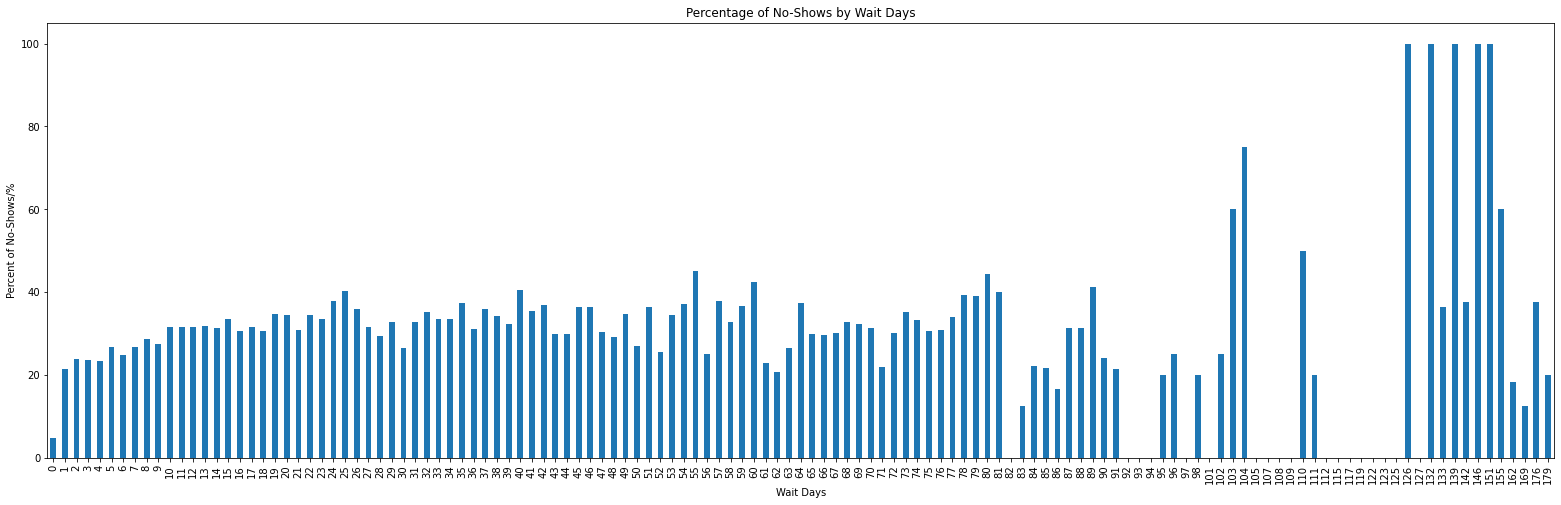

In [1372]:
plt.figure(figsize=(27,8))
ax07_01 = no_show_percentage(data=df,column="Wait_Days").plot(kind='bar')
ax07_01.set_title("Percentage of No-Shows by Wait Days")
ax07_01.set_ylabel("Percent of No-Shows/%")
ax07_01.set_xlabel("Wait Days")

* **The no-show percentage is lowest on 0 wait days. (Same day appointments)**
* **The no-show percentage is higher when wait days are over 103 days, but the number of appointments made with such long wait periods is very small. A few no-shows can affect the no-show rate greatly.**

**Below, make distribution plot comparing Appointment No-Show by Age.**

Text(0, 0.5, 'Appointment Count')

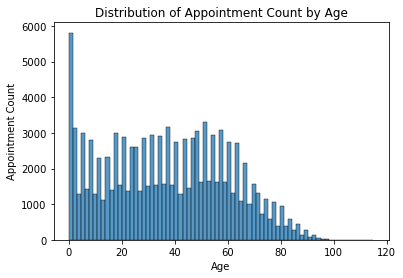

In [1373]:
plt.figure(figsize=(6,4))
plt.title('Distribution of Appointment Count by Age')
ax01_02 = sns.histplot(data=df,x='Age')
ax01_02.set_ylabel("Appointment Count")

* **There were more appointments for Age 0 (Newborns) than any other age group.**
* **The appointment count goes down after the age of 60, but that may be because older people are more likely to pass away, hence the lower population.**

**Below make distribution plot comparing appointment no-show by age.**

Text(0, 0.5, 'Appointment Count')

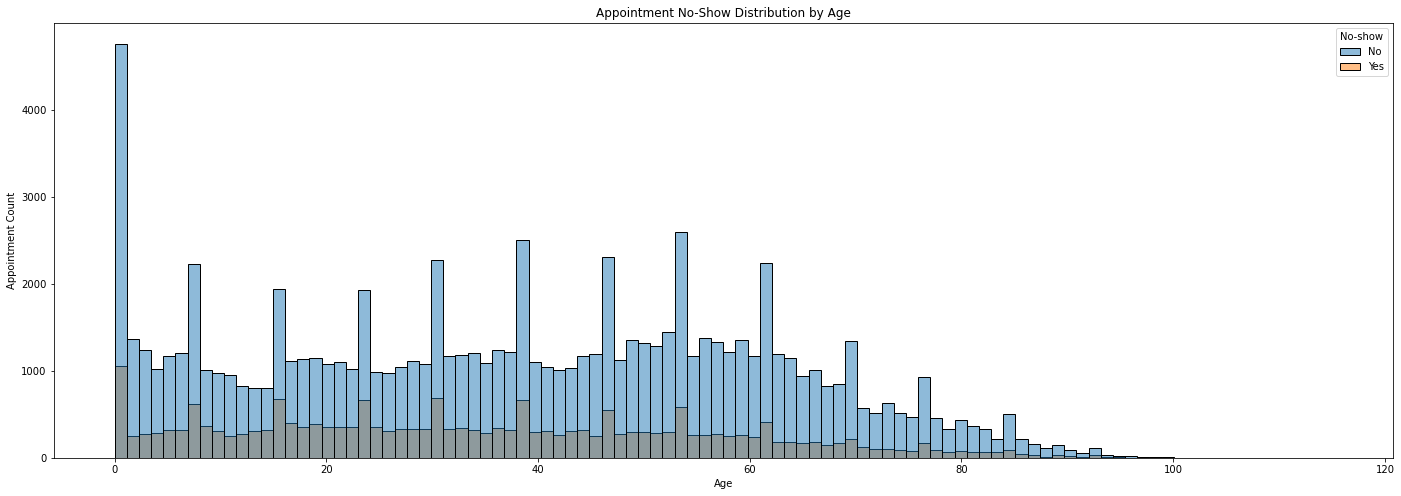

In [1374]:
plt.figure(figsize=(24,8))
ax08 = sns.histplot(x="Age", data=df, hue="No-show",bins=100,alpha=0.5)
ax08.set_title("Appointment No-Show Distribution by Age")
ax08.set_ylabel("Appointment Count")

* **The no-show rate is the highest amongst the 20 - 30 year age group.**
* **The no-show rate becomes lower for patients 50 years and older.**

**Below, make barplot of the percentage of no-shows by neighborhood of appointment.**

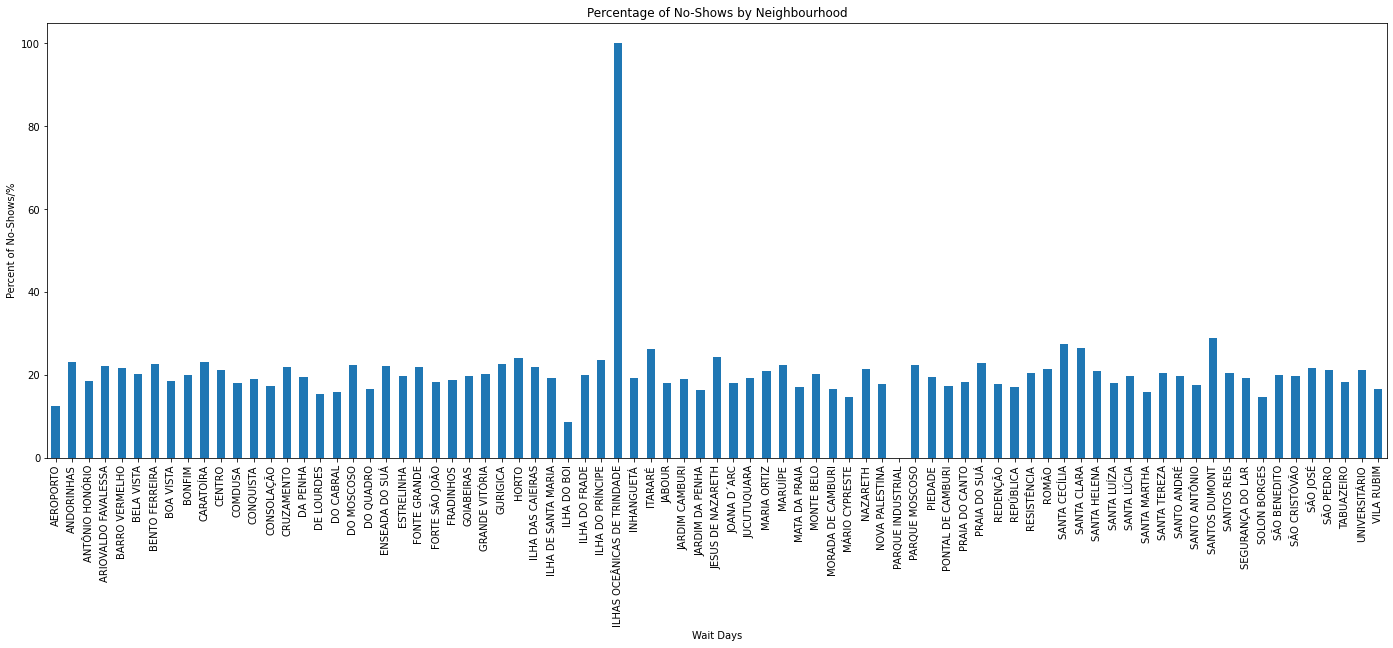

In [1375]:
plt.figure(figsize=(24,8))
ax10 = no_show_percentage(data=df,column="Neighbourhood").plot(kind='bar')
ax10 = plt.gca()
ax10.set_title("Percentage of No-Shows by Neighbourhood")
ax10.set_ylabel("Percent of No-Shows/%")
ax10.set_xlabel("Wait Days")
ax10.tick_params(axis='x', labelrotation = 90)
plt.show() 

* **Most neighborhoods have a no-show percentage of around 20 percent.**
* **ILHAS OCEÂNICAS DE TRINDADE has a 100 percent no-show rate.**
* **PARQUE INDUSTRIAL has a 0 percent no-show rate.**

**Below, see if ILHAS OCEÂNICAS DE TRINDADE and PARQUE INDUSTRIAL percentages are outliers because the number of appointments made in those neighborhoods are small.**

In [1376]:
neigh_all.nsmallest(5)

TypeError: Cannot use method 'nsmallest' with dtype object

* **Only one appointment was made in PARQUE INDUSTRIAL during the three months of this dataset.**
* **Only two appointments were made in ILHAS OCEÂNICAS DE TRINDADE  during the three months of this dataset.**
* **The two neighborhoods had outlier no-show rates because of the small numbers of appointments made there.**

## Conclusions

* **Overall, 20.2 percent of patients did not show up at their appointment.**
* **Patients from ages 20 - 30 are more likely to miss appointments.**
* **Patients receiving the scholarship are more likely to miss appointments.**
* **Patients receiving text messages(SMS) are more likely to miss appointments.**
* **No-show rates amongst patients with hypertension are lower than the average.**
* **Alcoholism does not affect no-show rates.**
* **Patients who scheduled the appointment on the same day (0 wait days) are less likely to miss appointments.**
* **The dataset is limited in that the no show appointments were only gathered for three months from 04/29/2016 and 6/8/2016. Some segments have few appointments so one or two no-shows have a large effect on the no-show rate.**